In [2]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/teo/userdata/SejongMusic


In [7]:
import torch

from omegaconf import OmegaConf

from sejong_music.jg_code import JeongganDataset, JeongganTokenizer
from sejong_music.model_zoo import JeongganTransSeq2seq
from sejong_music.inference import JGInferencer
from sejong_music.jg_to_staff_converter import JGToStaffConverter

config = OmegaConf.load('wandb/run-20240331_162810-ck6676ga/files/checkpoints/config.yaml')
dataset = JeongganDataset(is_valid=True)
tokenizer = JeongganTokenizer(None, None, json_fn='wandb/run-20240401_110925-gfmcjxfa/files/checkpoints/tokenizer_vocab.json')
dataset.tokenizer = tokenizer
model = JeongganTransSeq2seq(tokenizer, config.model)
inferencer = JGInferencer(model, is_condition_shifted=True, is_orch=True, top_p=0.7, temperature=0.9)
converter = JGToStaffConverter()

state_dict = torch.load('wandb/run-20240401_110925-gfmcjxfa/files/checkpoints/inst_0/iter72000_model.pt', map_location='cpu')
model.load_state_dict(state_dict)
# model.cuda()
model.eval()
None

In [8]:
state_dict['decoder.proj.bias']

tensor([-0.2116, -0.1758, -0.2065,  0.1496,  0.0329,  0.1521, -0.0335,  0.0710,
        -0.0014, -0.0804,  0.0812,  0.0348, -0.0158,  0.2349,  0.0124, -0.1451,
        -0.0009, -0.0702, -0.2766, -0.2150, -0.1166, -0.1320,  0.0935, -0.1669,
        -0.0501, -0.0157, -0.1299, -0.1301, -0.0357,  0.0850, -0.0125,  0.0194,
         0.0132, -0.1922,  0.0901,  0.0930,  0.1007,  0.0044, -0.0037, -0.0190,
         0.0677, -0.0101,  0.0159, -0.0382, -0.1103, -0.0910, -0.0935,  0.0320,
        -0.1177, -0.0935, -0.1087, -0.3318, -0.2050, -0.1593, -0.0831, -0.1677,
         0.0151, -0.2106, -0.0449, -0.0460, -0.1396, -0.1586, -0.2018, -0.1617,
        -0.2003,  0.1175,  0.0794, -0.0678,  0.0140,  0.0762, -0.1588, -0.0678,
        -0.0777, -0.0853, -0.1664, -0.2203, -0.0542, -0.0681, -0.2277, -0.1082,
        -0.1623,  0.0884, -0.1514, -0.0584, -0.1088, -0.1864, -0.0282, -0.0992,
        -0.0660, -0.2310, -0.0582, -0.1244, -0.1835, -0.1669, -0.0499, -0.0721,
        -0.0652, -0.2406, -0.1115, -0.18

In [6]:
state_dict['decoder.proj.bias']

tensor([-0.2116, -0.1758, -0.2065,  0.1496,  0.0329,  0.1521, -0.0335,  0.0710,
        -0.0014, -0.0804,  0.0812,  0.0348, -0.0158,  0.2349,  0.0124, -0.1451,
        -0.0009, -0.0702, -0.2766, -0.2150, -0.1166, -0.1320,  0.0935, -0.1669,
        -0.0501, -0.0157, -0.1299, -0.1301, -0.0357,  0.0850, -0.0125,  0.0194,
         0.0132, -0.1922,  0.0901,  0.0930,  0.1007,  0.0044, -0.0037, -0.0190,
         0.0677, -0.0101,  0.0159, -0.0382, -0.1103, -0.0910, -0.0935,  0.0320,
        -0.1177, -0.0935, -0.1087, -0.3318, -0.2050, -0.1593, -0.0831, -0.1677,
         0.0151, -0.2106, -0.0449, -0.0460, -0.1396, -0.1586, -0.2018, -0.1617,
        -0.2003,  0.1175,  0.0794, -0.0678,  0.0140,  0.0762, -0.1588, -0.0678,
        -0.0777, -0.0853, -0.1664, -0.2203, -0.0542, -0.0681, -0.2277, -0.1082,
        -0.1623,  0.0884, -0.1514, -0.0584, -0.1088, -0.1864, -0.0282, -0.0992,
        -0.0660, -0.2310, -0.0582, -0.1244, -0.1835, -0.1669, -0.0499, -0.0721,
        -0.0652, -0.2406, -0.1115, -0.18

In [41]:
src, tgt, shifted_tgt = dataset[100]

source, output, _ = inferencer.inference(src, inst_name='daegeum')
output_str = [x[0] for x in output]


In [42]:
note_dict, stream = converter.convert_inference_result(output, source)

scales: ['협', '중', '임', '무']
scales: ['황', '협', '중', '임', '무']
scales: ['황', '협', '중', '임', '무']
scales: ['황', '중', '임', '무']


In [43]:
output

[['start', 'prev|', 'jg:0', 'gak:0', 'daegeum'],
 [':0', 'prev:0', 'jg:0', 'gak:0', 'daegeum'],
 ['청임', 'prev:0', 'jg:0', 'gak:0', 'daegeum'],
 ['|', 'prev|', 'jg:1', 'gak:0', 'daegeum'],
 ['|', 'prev|', 'jg:2', 'gak:0', 'daegeum'],
 [':9', 'prev:9', 'jg:2', 'gak:0', 'daegeum'],
 ['노', 'prev:9', 'jg:2', 'gak:0', 'daegeum'],
 ['|', 'prev|', 'jg:3', 'gak:0', 'daegeum'],
 [':0', 'prev:0', 'jg:3', 'gak:0', 'daegeum'],
 ['청임', 'prev:0', 'jg:3', 'gak:0', 'daegeum'],
 ['떠이어표', 'prev:0', 'jg:3', 'gak:0', 'daegeum'],
 ['|', 'prev|', 'jg:4', 'gak:0', 'daegeum'],
 [':8', 'prev:8', 'jg:4', 'gak:0', 'daegeum'],
 ['니나*', 'prev:8', 'jg:4', 'gak:0', 'daegeum'],
 ['|', 'prev|', 'jg:5', 'gak:0', 'daegeum'],
 [':0', 'prev:0', 'jg:5', 'gak:0', 'daegeum'],
 ['청무', 'prev:0', 'jg:5', 'gak:0', 'daegeum'],
 ['\n', 'prev\n', 'jg:0', 'gak:1', 'daegeum'],
 [':0', 'prev:0', 'jg:0', 'gak:1', 'daegeum'],
 ['청임', 'prev:0', 'jg:0', 'gak:1', 'daegeum'],
 ['|', 'prev|', 'jg:1', 'gak:1', 'daegeum'],
 [':0', 'prev:0', 'jg

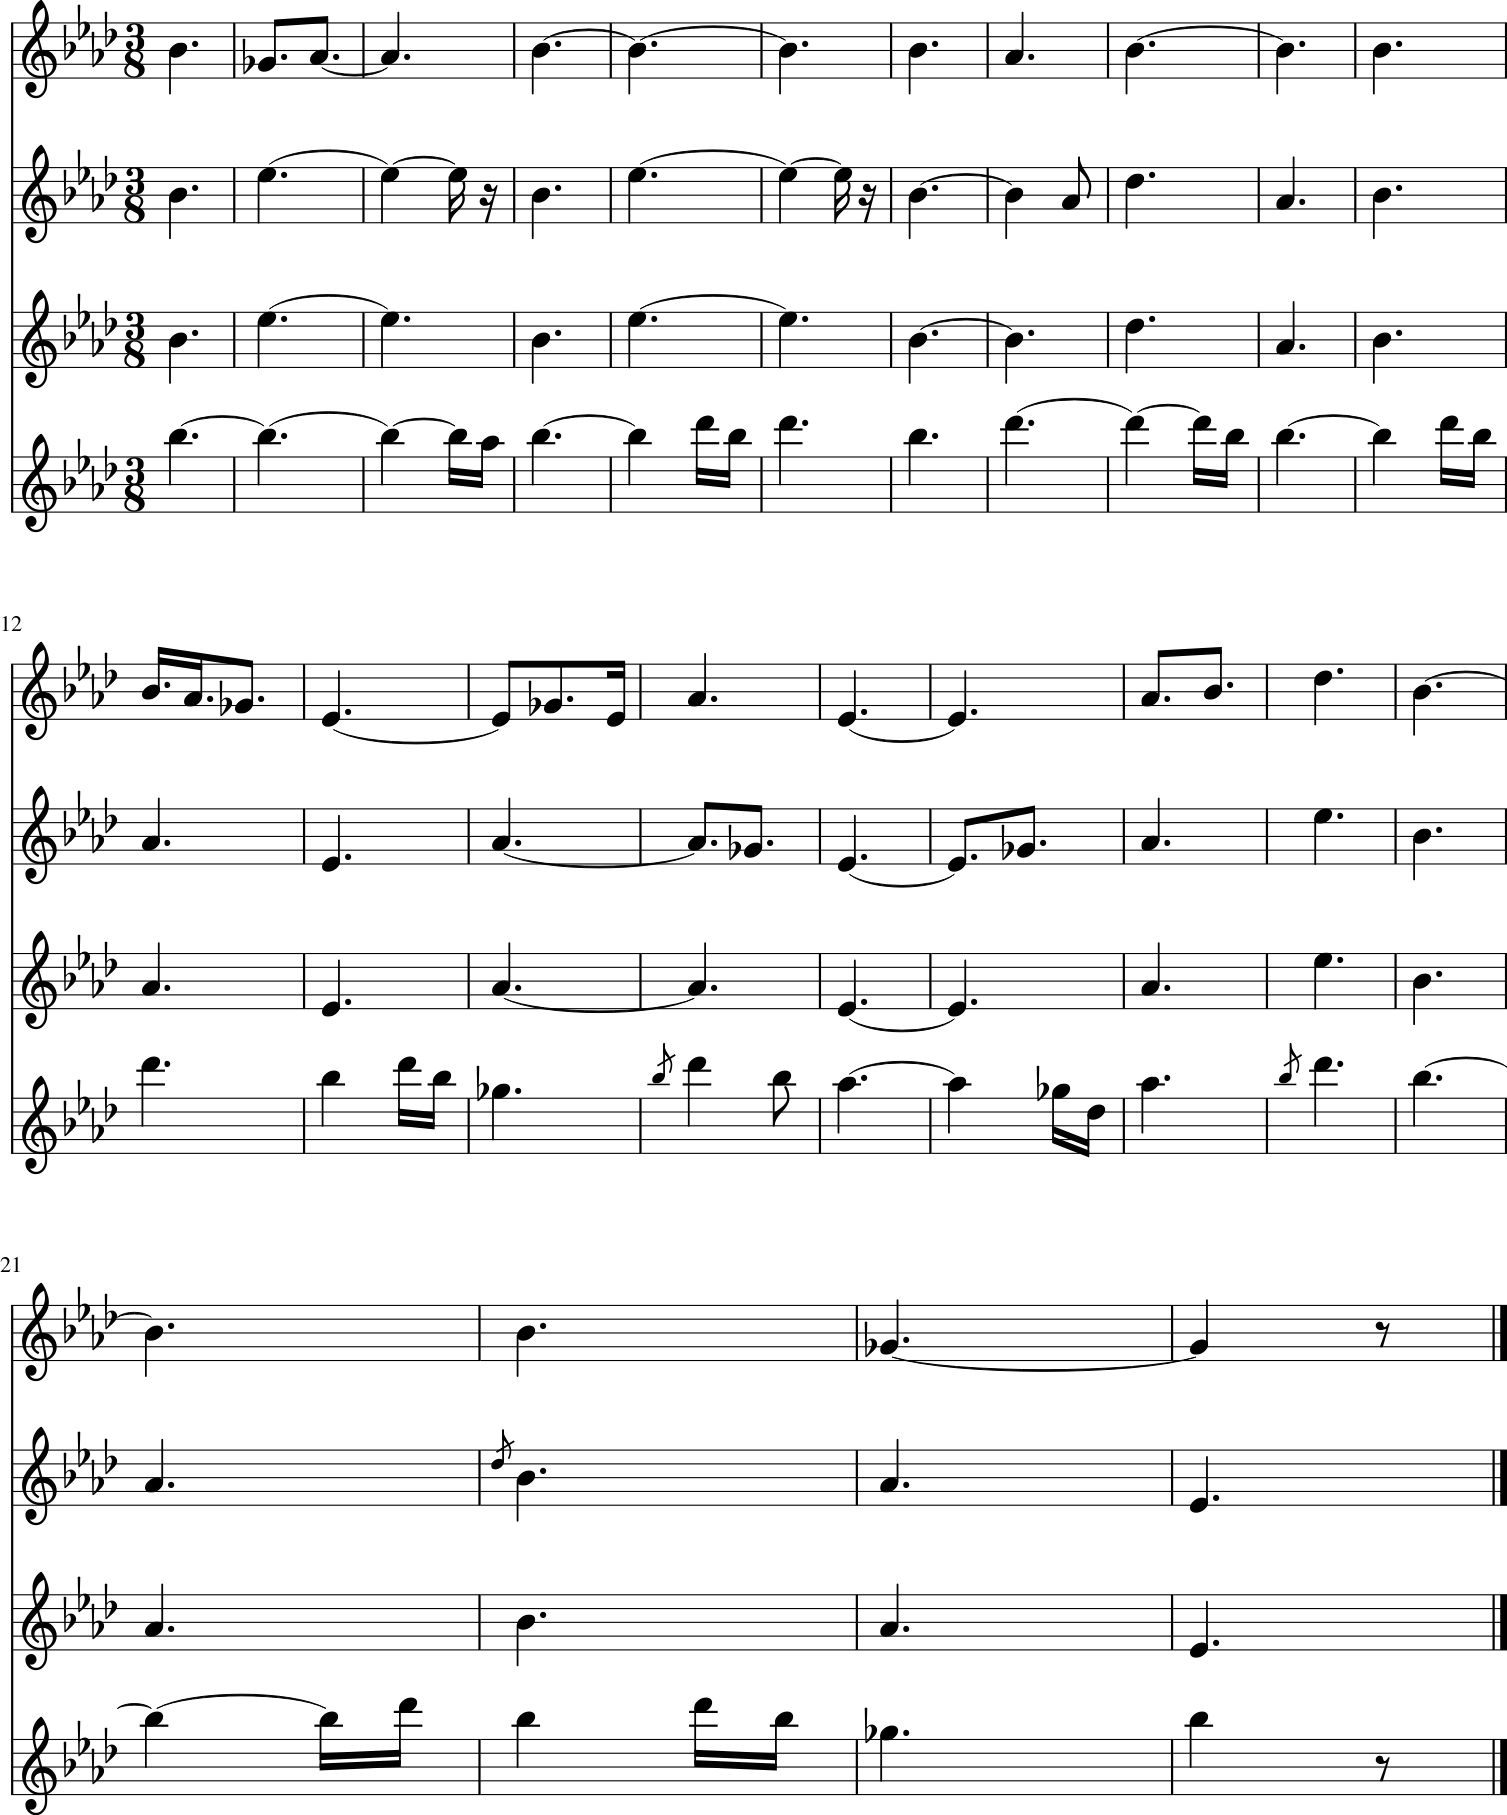

In [44]:
stream.show()

In [18]:
stream.write('musicxml', 'transformer_output.xml')

PosixPath('/home/teo/userdata/SejongMusic/transformer_output.xml')